In [18]:
import numpy as np
def generate_test_matrix(cols:int, final_index:int):
    # Calculate the number of rows based on the final index and number of columns
    rows = (final_index + 1) // (cols - 1)
    
    # Check if an additional row is needed to reach the final index
    if (final_index + 1) % (cols - 1) != 0:
        rows += 1
    
    # Initialize a matrix filled with zeros
    matrix = np.zeros((rows, cols),dtype=int)
    
    # Fill the matrix according to the specified pattern
    current_value = 0
    for i in range(rows):
        for j in range(cols):
            if current_value <= final_index:
                matrix[i, j] = current_value
                current_value += 1
        current_value -= 1  # Repeat the last element in the next row
                
    return matrix[:-1,:]

x = np.random.rand(1000,64,64)
# col = num snapshot +1 final_indx = total_sample -1
idx_matrix = generate_test_matrix(20+1, 100-1) * int(10)
print(idx_matrix)
new_x = np.array([x[idx_matrix[i,1:]] for i in range(idx_matrix.shape[0])])
print(idx_matrix.shape)
print(new_x.shape)

[[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
  180 190 200]
 [200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370
  380 390 400]
 [400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570
  580 590 600]
 [600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770
  780 790 800]]
(4, 21)
(4, 20, 64, 64)


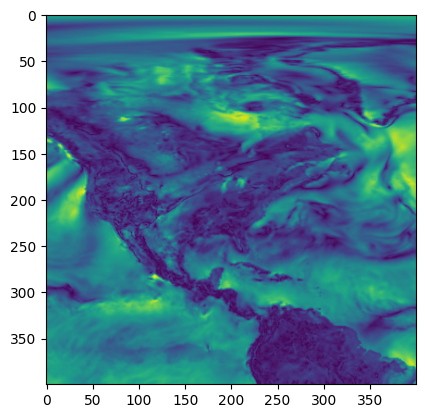

In [20]:
import h5py 
import matplotlib.pyplot as plt
import numpy as np
import torch

file = h5py.File('combined_climate_0715.h5', 'r')
data = file["fields"][()]
plt.imshow(data[240,0,:,:]);

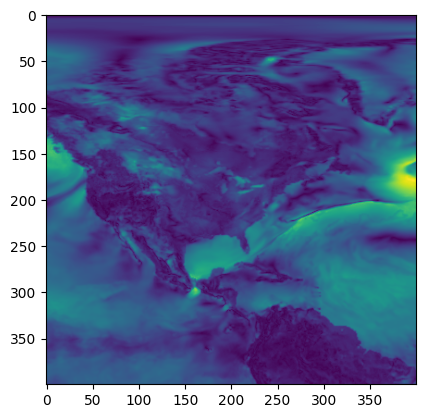

In [19]:
plt.imshow(data[30,0,0:400,900:1300]);

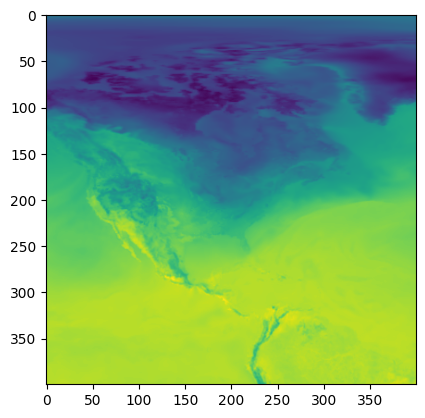

In [15]:
plt.imshow(data[30,1,0:400,900:1300]);

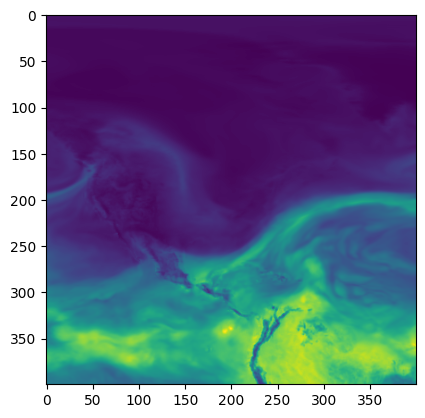

In [16]:
plt.imshow(data[30,2,0:400,900:1300]);

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn
CMAP = seaborn.cm.icefire
decay_turb = '../Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5'

In [10]:
data_info = {"decay_turb":['../Decay_Turbulence_small/train/Decay_turb_small_128x128_9253.h5', 0.02], #33
                 "burger2d": ["../Burgers_2D_small/train/Burgers2D_128x128_702.h5",0.001],
                 "rbc": ["../RBC_small/train/RBC_small_165_s2.h5",0.01]}

f = h5py.File(data_info["decay_turb"][0],'r')
print(f['tasks']['t'][()])
t = np.ceil(f['tasks']['t'][0])
w = f['tasks']['vorticity'][()]
print(w.shape)
w = w[::5]

[ 4.90873852  4.92101037  4.93328221 ... 29.41561559 29.42788743
 29.44015928]
(2000, 128, 128)


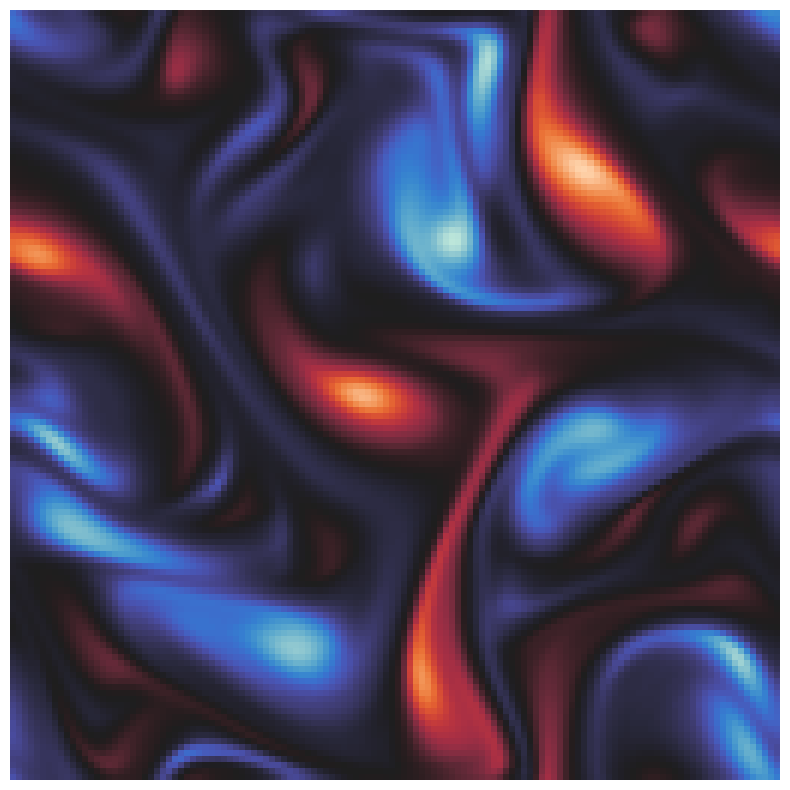

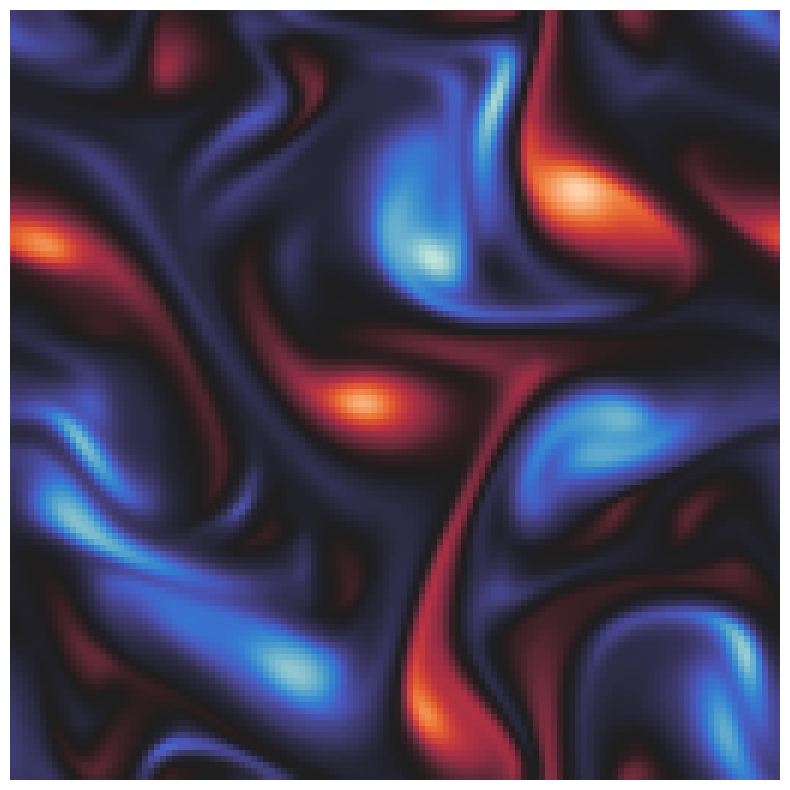

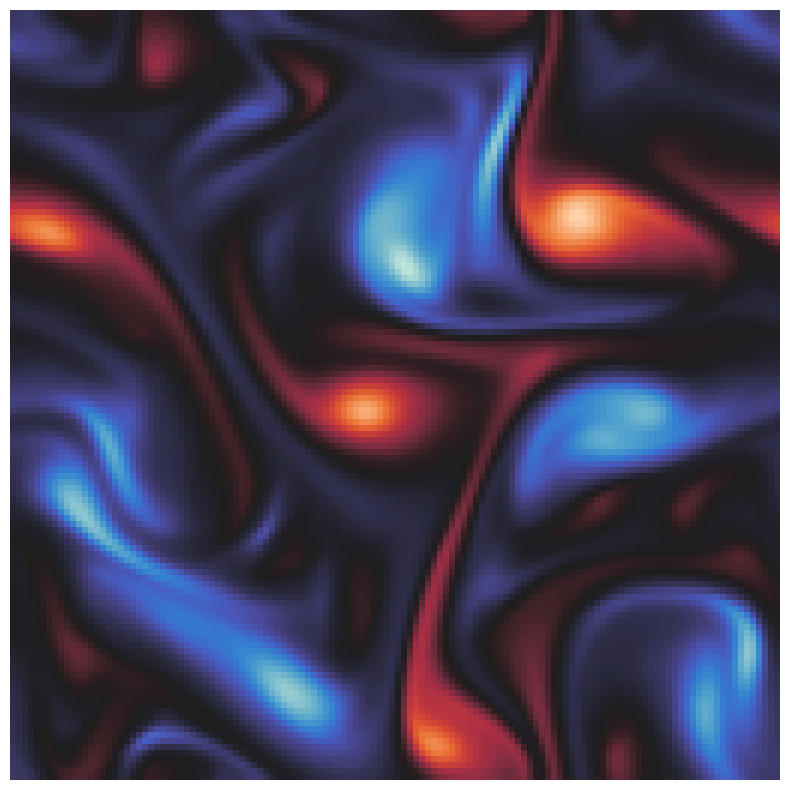

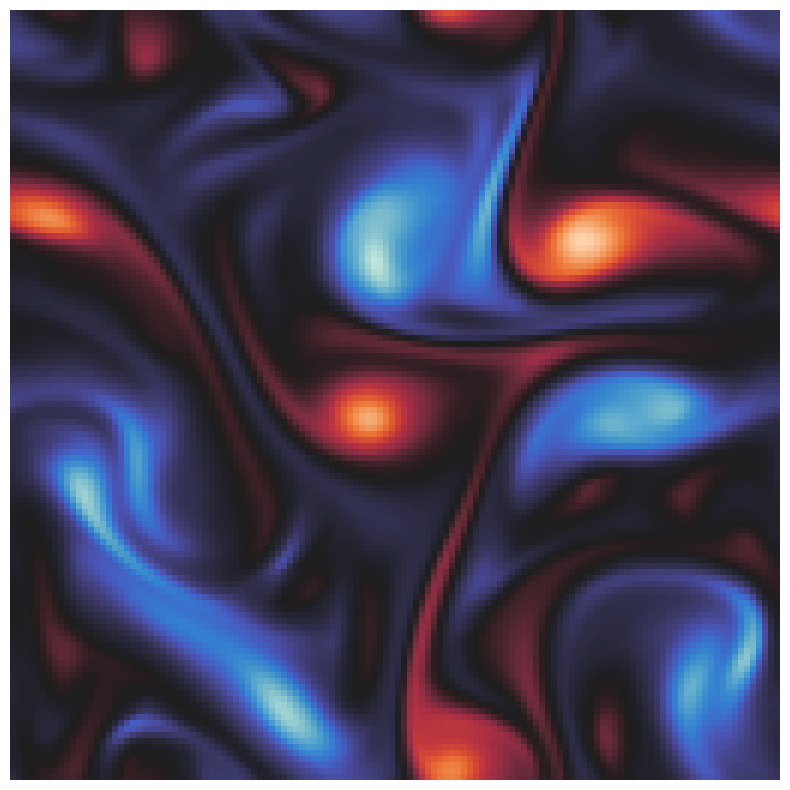

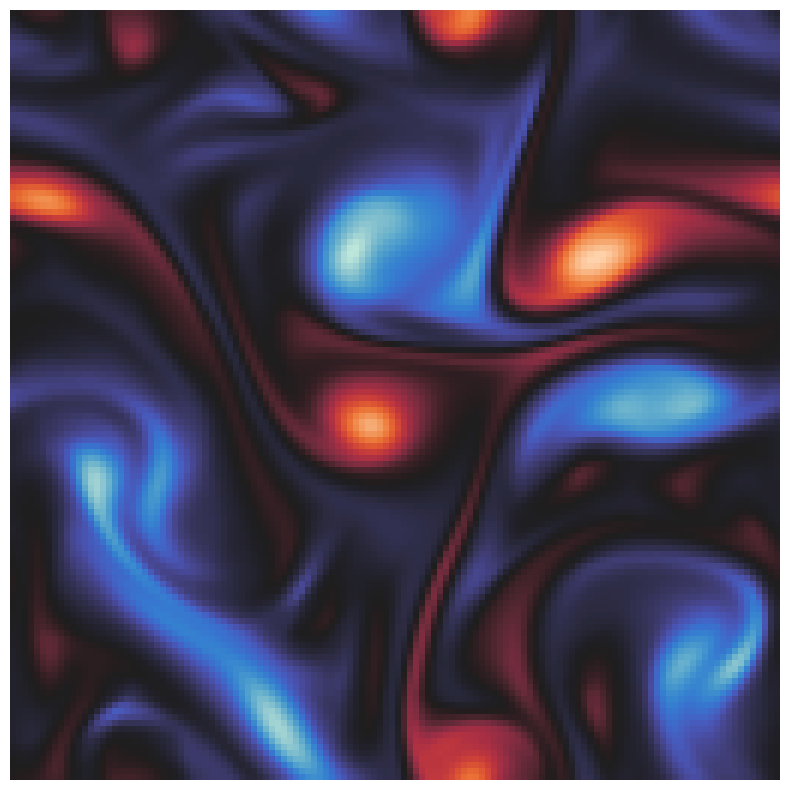

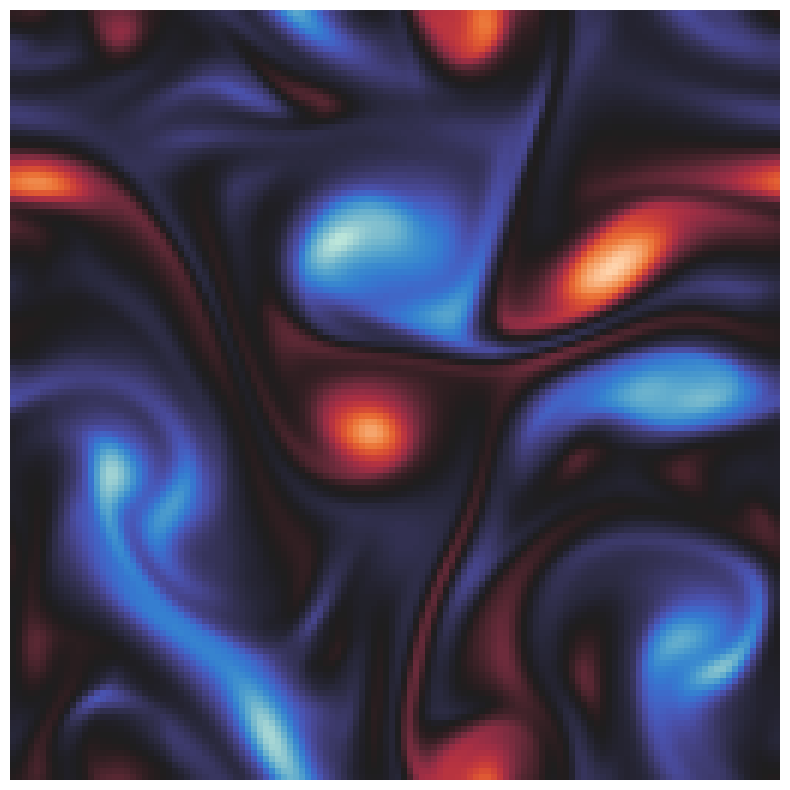

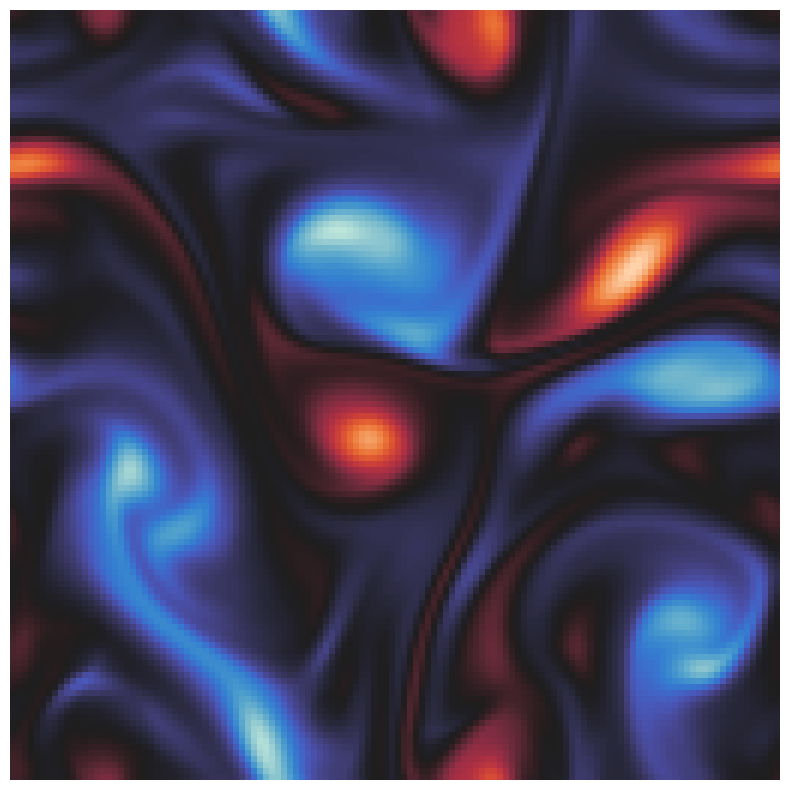

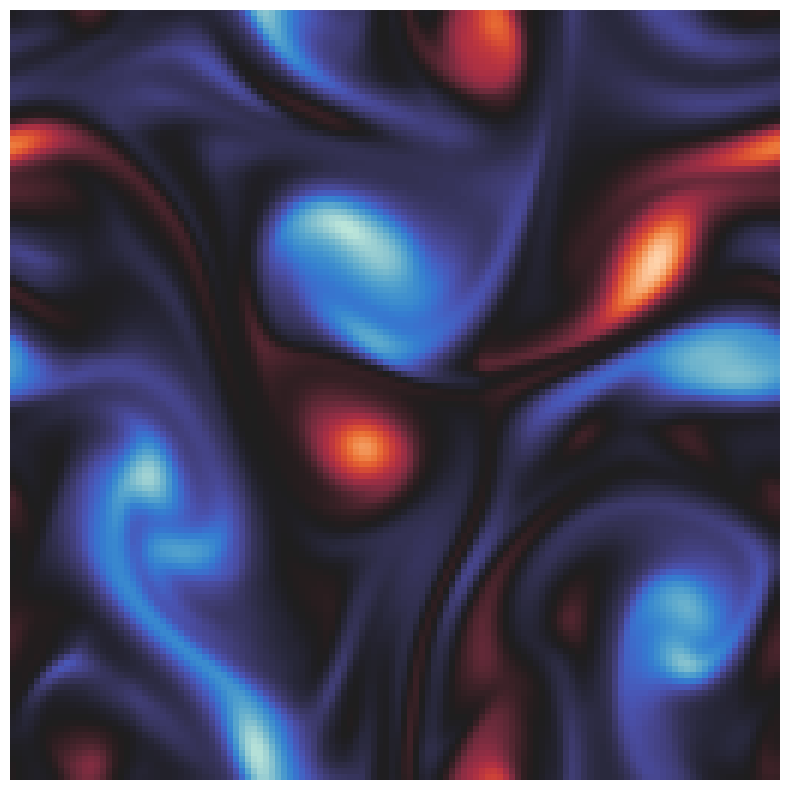

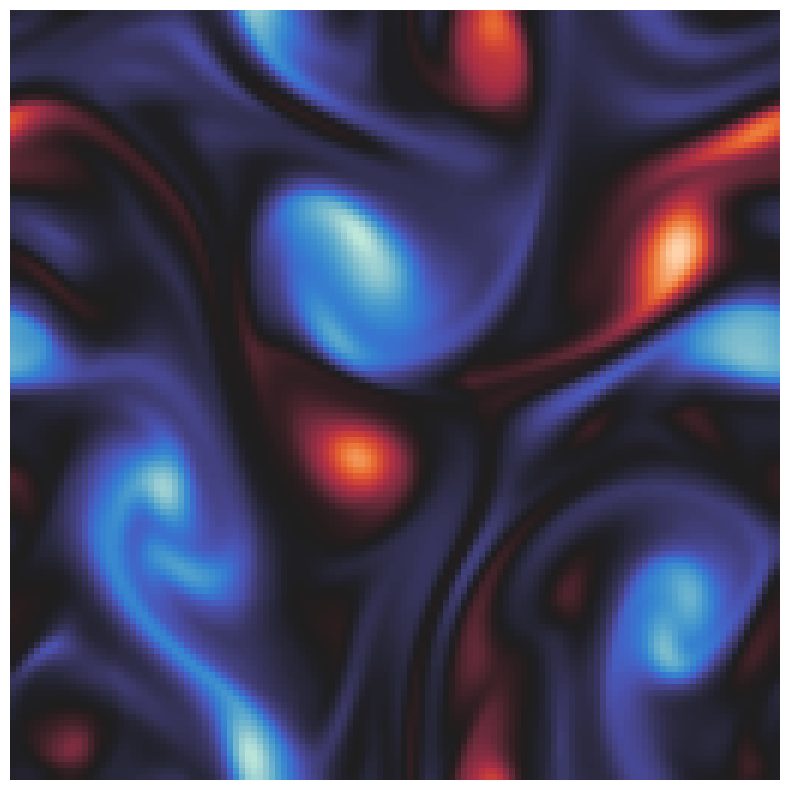

In [11]:
w_input_lr = w[:,:,:]
for i in range(9):
    plt.figure(figsize=(10,10))
    plt.imshow(w_input_lr[i*5], cmap=CMAP)
    plt.axis('off')
    plt.savefig(f'w_input_HR_{i*5}.pdf', bbox_inches='tight')

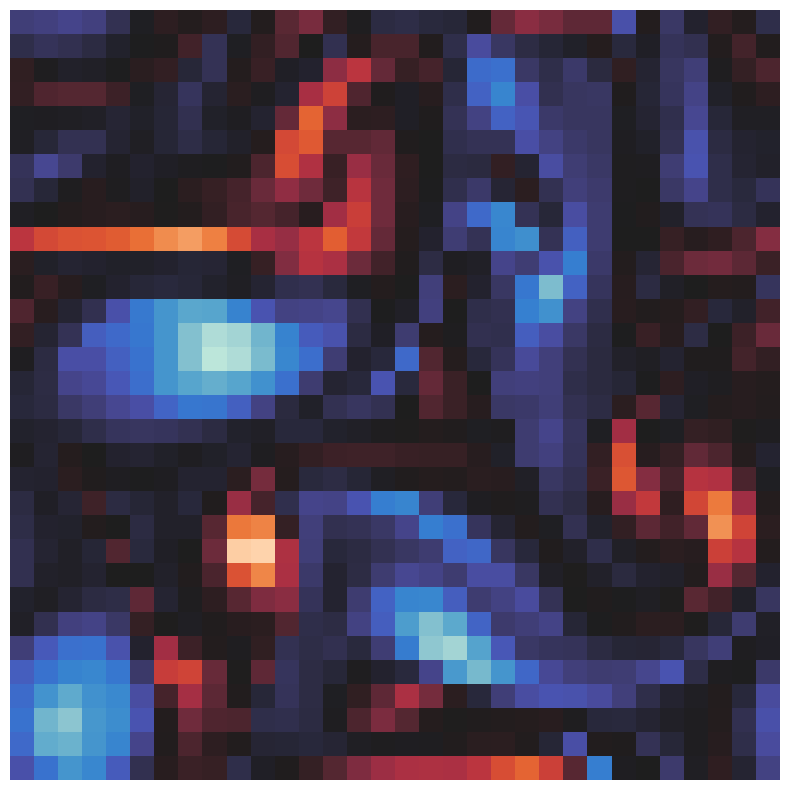

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(w_input_lr[1], cmap=CMAP)
plt.axis('off')
plt.savefig('w_input_lr_20.svg', bbox_inches='tight')


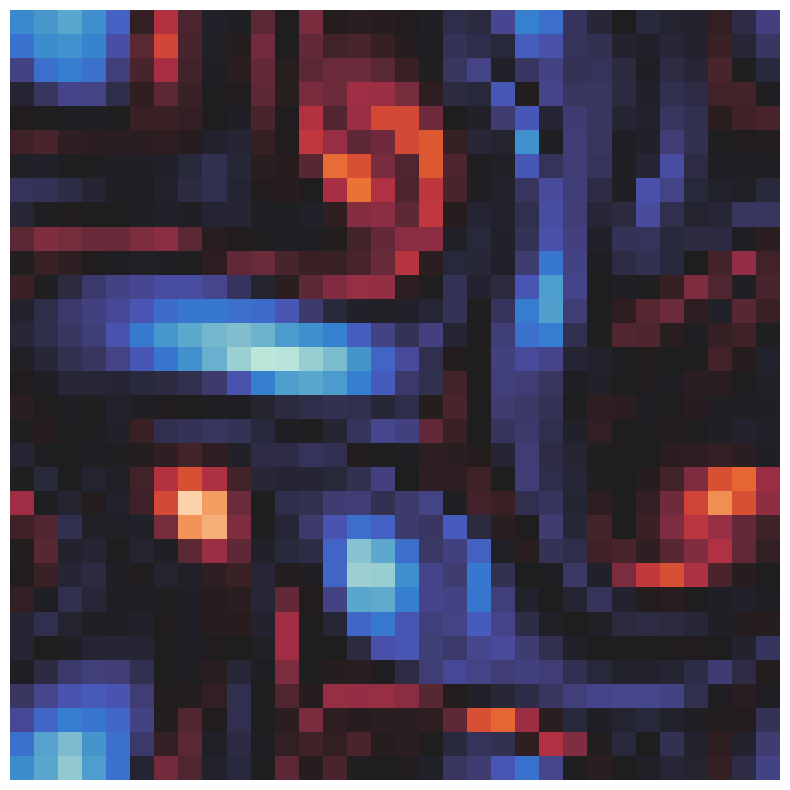

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(w_input_lr[2], cmap=CMAP)
plt.axis('off')
plt.savefig('w_input_lr_40.svg', bbox_inches='tight')